In [1]:
import numpy as np
from numpy import genfromtxt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA
import sklearn
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches

import pandas as pd

class schnet_analyzer:
    def __init__(self,element,file_path,label,dimension,data):
        self.element = element
        self.file_path = file_path
        self.label = label
        self.dimension = dimension
        self.data = data
        
    def colors(self):
        if element == 'O':
            colors=['tomato','violet','lightgreen','gold','pink',
                'purple','green','darkgreen','brown','lime',
                'cyan','grey','red','indianred','maroon',
                'navy','violet','cornflowerblue','palegreen','lightsalmon',
                'sandybrown','skyblue','lavender','chocolate','black',
                'firebrick','antiquewhite','indigo','teal','bisque',
                'olive','sandybrown','orange','darkseagreen','rosybrown','white']
        if element == 'H':
            colors=['black','red','orange','gold','pink',
                'green','skyblue','blue','brown','lime',
                'cyan','grey','darkslategrey','tan','lightsteelblue',
                'navy','violet','cornflowerblue','palegreen','lightsalmon',
                'sandybrown','peru','lavender','tomato','chocolate',
                'khaki','antiquewhite','indigo','teal','bisque','olive']
        if element == 'N':
            print('not implemented')
        if element == 'C':
            print('not implemented')
        return colors

    def plot(x,dimension):
        #hydrogen
        methyl = mpatches.Patch(color='skyblue', label='methyl')
        methylene = mpatches.Patch(color='green', label='methylene')
        methine = mpatches.Patch(color='lime',label='methine')
        alkene = mpatches.Patch(color='tan',label='alkene')
        primaryamine = mpatches.Patch(color='tomato',label='primary-amine')
        secondaryamine = mpatches.Patch(color='chocolate',label='secondary-amine')
        alcohols = mpatches.Patch(color='teal',label='alcohols')
        methylO = mpatches.Patch(color='gold',label='methyl-O')
        methylN = mpatches.Patch(color='pink',label='methyl-N')
        methyleneN = mpatches.Patch(color='orange',label='methylene-N')
        methyleneO = mpatches.Patch(color='blue',label='methylene-O')
        methineN = mpatches.Patch(color='cyan',label='methine-N')
        methineO = mpatches.Patch(color='grey',label='methine-O')
        alkeneO = mpatches.Patch(color='lightsteelblue',label='alkene-O')
        alkeneN = mpatches.Patch(color='navy',label='alkene-N')
        
        #oxygen
        aldehyde = mpatches.Patch(color='violet', label='aldehyde')
        terminalamide = mpatches.Patch(color='lightgreen', label='terminal-amide')
        terminalester = mpatches.Patch(color='gold',label='terminal-ester')
        internalester = mpatches.Patch(color='pink',label='internal-ester')
        ketone = mpatches.Patch(color='purple',label='ketone')
        internalamide = mpatches.Patch(color='green',label='internal-amide')
        urea = mpatches.Patch(color='darkgreen',label='urine')
        amideester = mpatches.Patch(color='darkseagreen',label='amide-ester')
        primaryalcohol = mpatches.Patch(color='red',label='primary-alcohol')
        secondaryalcohol = mpatches.Patch(color='indianred',label='secondary-alcohol')
        tertiaryalcohol = mpatches.Patch(color='maroon',label='tertiary-alcohol')
        ether = mpatches.Patch(color='orange',label='ether')
        alcoholamine = mpatches.Patch(color='rosybrown',label='alcohol-amine')
        hemiacetal = mpatches.Patch(color='black',label='hemiacetal')
        alcoholalkene = mpatches.Patch(color='skyblue',label='alcohol-akene')
        
        if dimension == 2:
            ax = plt.axes()
            ax.set_xlabel('First PC')
            ax.set_ylabel('Second PC')
            
            color = schnet_analyzer.colors(element)
            ax.scatter(x[:,0],x[:,1], c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
            
        if dimension == 3:
            ax = plt.axes(projection = '3d')
            ax.set_xlabel('First PC')
            ax.set_ylabel('Second PC')
            ax.set_zlabel('Third PC')
            
            color = schnet_analyzer.colors(element)
            ax.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
        if element == 'H':
            ax.legend(bbox_to_anchor=(1.5, 1.0),handles=[methyl,methylene,
                                                         methine,alkene,
                                                         primaryamine,secondaryamine,
                                                         alcohols,methylO,methylN,
                                                         methyleneN,methyleneO,methineN,methineO,
                                                         alkeneO,alkeneN])
        if element == 'O':
            ax.legend(bbox_to_anchor=(1.5, 1.0),handles=[aldehyde,terminalamide,
                                                         terminalester,internalester,
                                                         ketone,internalamide,
                                                         urea,amideester,primaryalcohol,
                                                         secondaryalcohol,tertiaryalcohol,
                                                         ether,alcoholamine,
                                                         hemiacetal,alcoholalkene])
#            ax.view_init(10,230)        
    
        
    def pca_analysis(self,data):
        #scale data (if necessary)
        if scale_data == True:
            scaler = StandardScaler()
            scaler.fit(data)
            data = scaler.transform(data)
        #perform PCA decomposition of the data
        pca = PCA(n_components)
        pca.fit(data)
        x_pca = pca.transform(data)
    
        #plot the PCA if dimension 2 or 3, if element H or O for colors/legend
        x=x_pca
        schnet_analyzer.plot(x,dimension)
        
        
    def pca_correlations(self):
        pass
    
    def tsne_analysis(self,data,dimension,perp):
        #Implementing the TSNE Function - ah Scikit learn makes it so easy!
        x = TSNE(n_components=dimension,perplexity=perp).fit_transform(data)
        schnet_analyzer.plot(x,dimension)




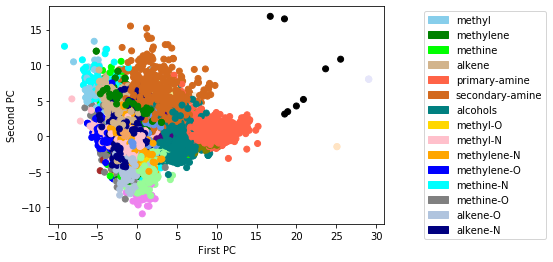

In [2]:
element = 'H'
file_path = '../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_5/data%s.csv' %(element)
label_path = '../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_0/label%s.csv' %(element)
label = pd.read_csv(label_path,delimiter=',')
data = genfromtxt(file_path,delimiter=',')
scale_data = True
n_components = 30
dimension = 2
analysis = schnet_analyzer(element,file_path,label,dimension,data)

schnet_analyzer.pca_analysis(element,data)


In [ ]:
perp = 600
schnet_analyzer.tsne_analysis(element,data,dimension,perp)